**Author**: Thinula Jayavihan Gunasinghe

**Reused Code Block Origin**: Code Reuse Session 2 - Classfication Modelling and Hyperparameters Tuning

Code Reuse Session 2 - Reuse Block 1 , Reuse Block 7 Code Block 24

In [28]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import GridSearchCV ,train_test_split
import numpy as np

Code Reuse Session 2 - Reuse Block 2

In [29]:
# Read the mortality dataset from CSV file
mortality_data = pd.read_csv('mortality_status.csv')

Code Reuse Session - Reuse Block 5

In [30]:
# Configure pandas display settings for better visualization
pd.set_option('display.max_rows', 500)      # Show up to 500 rows
pd.set_option('display.max_columns', 500)   # Show up to 500 columns
pd.set_option('display.width', 150)         # Set display width to 150 characters

Code Reuse Session 2 - Reuse Block 4

In [31]:
#Display dataset information (rows, columns, data types)
mortality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3984 entries, 0 to 3983
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3984 non-null   int64  
 1   Sex                     3984 non-null   int64  
 2   T_Stage                 3984 non-null   int64  
 3   N_Stage                 3984 non-null   int64  
 4   6th_Stage               3984 non-null   int64  
 5   Differentiated          3984 non-null   int64  
 6   Grade                   3984 non-null   int64  
 7   A_Stage                 3984 non-null   int64  
 8   Tumor_Size              3984 non-null   int64  
 9   Estrogen_Status         3984 non-null   int64  
 10  Progesterone_Status     3984 non-null   int64  
 11  Regional_Node_Examined  3984 non-null   float64
 12  Reginol_Node_Positive   3984 non-null   int64  
 13  Survival_Months         3984 non-null   int64  
 14  Mortality_Status        3984 non-null   

Code Reuse Session 2 - Reuse Block 3

In [32]:
# Show first few rows of the dataset
mortality_data.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,68,1,0,0,0,1,3,1,4,1,1,24.0,1,60,1
1,50,1,1,1,2,0,2,1,35,1,1,14.0,5,62,1
2,58,1,2,2,4,0,2,1,63,1,1,14.0,7,75,1
3,58,1,0,0,0,1,3,1,18,1,1,2.0,1,84,1
4,47,1,1,0,1,1,3,1,41,1,1,3.0,1,50,1


Code Reuse Session 2 - Reuse Block 6

In [33]:
# Extract features and target variable
feature_cols = ['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 
                'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 
                'Progesterone_Status', 'Regional_Node_Examined', 
                'Reginol_Node_Positive', 'Survival_Months']
X = mortality_data[feature_cols]      # Features matrix
y = mortality_data['Mortality_Status'] # Target variable

Code Reuse Session 2 - Reuse Block 8

In [34]:
# Split data into training and test sets
# test_size=0.2 means 20% data for testing
# random_state=42 ensures reproducibility
# stratify=y maintains the same proportion of samples for each class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20,stratify=y)

Code Reuse Session 2 - Reuse Block 9 , Reuse Block 10, Reuse Block 11

In [35]:
# Initialize and train Logistic Regression model
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Code Reuse Session 2 - Code Block 13

In [36]:
# Generate predictions using logistic regression
y_pred = logreg.predict(X_test)

Code Reuse Session 2 -  Code Block 14

In [37]:
# Create comparison dataframe
Comparison_df=pd.DataFrame({'Actual' : y_test,  'Predicted' : y_pred})
Comparison_df

,Actual,Predicted
741,1,1
3972,1,1
698,1,1
605,1,1
115,1,1
...,...,...
2980,1,1
3368,1,1
1068,1,1
3520,1,1


Code Reuse Session 2 - Code Block 17

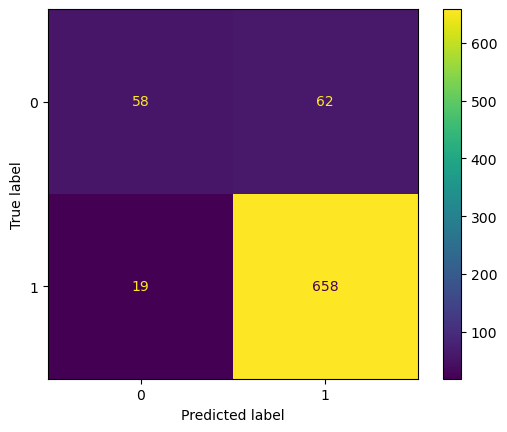

In [38]:
# Evaluate logistic regression performance using confusion matrix and visualization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score  # Import required metrics

# Create confusion matrix by comparing actual (y_test) vs predicted (y_pred) values
# labels parameter ensures consistent order of classes
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)

# Create a visual display object for the confusion matrix
# display_labels parameter sets the axis labels using the model's classes
desp = ConfusionMatrixDisplay(cm, display_labels=logreg.classes_)

# Generate and display the confusion matrix plot
# This shows true positives, true negatives, false positives, and false negatives
desp.plot()

Code Reuse Session 2 - Code Block 12 , Code Block 15

In [39]:
# Calculate training accuracy
y_pred_train = logreg.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print ("The accuracy is: ", accuracy)

The accuracy is:  0.898650768748039


Code Reuse Session 2 - Code Block 16

In [40]:
# Calculate testing accuracy
accuracy = accuracy_score(y_test, y_pred)
print ("The accuracy is: ", accuracy)

The accuracy is:  0.8983688833124216


Code Reuse Session 2 - Code Block 18

In [41]:
# Generate detailed classification metrics
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.48      0.59       120
           1       0.91      0.97      0.94       677

    accuracy                           0.90       797
   macro avg       0.83      0.73      0.77       797
weighted avg       0.89      0.90      0.89       797



Code Reuse Session 2 - Code Block 19

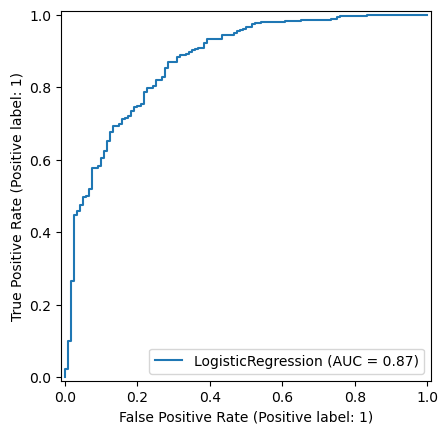

In [42]:
# Plot ROC curve for logistic regressio
from sklearn.metrics import RocCurveDisplay
logreg_roc = RocCurveDisplay.from_estimator(logreg, X_test, y_test)

Code Reuse Session - Code Block 20 , Code Block 21 , Code Block 22

In [43]:
# Initialize and train KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Code Reuse Session 2 - Code Block 19 , Code Block 13 , Code Block 16 , Code Block 23

In [44]:
# Evaluate KNN performance by making predictions and calculating metrics
y_pred_knn = knn.predict(X_test)      # Make predictions on test data using trained KNN model
# Calculate the accuracy score by comparing predictions with actual values
# accuracy_score returns the percentage of correct predictions
accuracy = accuracy_score(y_test, y_pred_knn)  
# Print the overall accuracy score
print ("the accuracy is: ", accuracy)
# Print header for the detailed classification report
print("Classification Report for KNN:")
# Generate and print detailed metrics including precision, recall, f1-score for each class
# zero_division=0 handles division by zero cases by setting the result to 0
print(classification_report(y_test, y_pred_knn, zero_division=0))

the accuracy is:  0.877038895859473
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.65      0.40      0.49       120
           1       0.90      0.96      0.93       677

    accuracy                           0.88       797
   macro avg       0.77      0.68      0.71       797
weighted avg       0.86      0.88      0.86       797



Code Reuse Session 2 - Code Block 25

In [45]:
# Optimize KNN using Grid SearchCV
# Define parameter grid for KNN optimization
param_grid = {
    'n_neighbors': np.arange(1,30),     # Test k values from 1 to 29
    'metric': ['euclidean', 'manhattan'] # Test both distance metrics
}
# Create GridSearchCV object
knn_gscv = GridSearchCV(
    knn,                    # Base KNN model to tune
    param_grid,            # Parameter grid to search
    cv = 5,               # Number of cross-validation folds
    scoring='roc_auc'     # Metric to optimize (area under ROC curve)
)
# Fit the grid search to find best parameters
knn_gscv.fit(X, y)        # Train model on all parameter combinations

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='roc_auc')

Code Reuse Session 2 - Code Block 25

In [46]:
# Display best parameters from grid search
knn_gscv.best_params_

{'metric': 'manhattan', 'n_neighbors': 28}

Code Reuse Session 2 - Code Block 26

In [47]:
# Make predictions with optimized KNN
y_pred = knn_gscv.predict(X_test)

Code Reuse Session 2 - Code Block 17

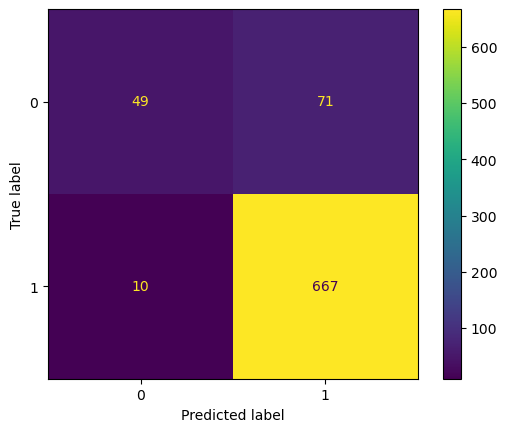

In [48]:
# Create confusion matrix for optimized KNN
cm_knn = confusion_matrix(y_test, y_pred, labels=knn_gscv.classes_)
disp_knn_cm = ConfusionMatrixDisplay(cm_knn, display_labels=np.unique(y_test))
disp_knn_cm.plot()

Code Reuse Session 2 - Code Block 18

In [49]:
# Generate classification report for optimized KNN
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.41      0.55       120
           1       0.90      0.99      0.94       677

    accuracy                           0.90       797
   macro avg       0.87      0.70      0.75       797
weighted avg       0.89      0.90      0.88       797



Code Reuse Session - Code Block 19

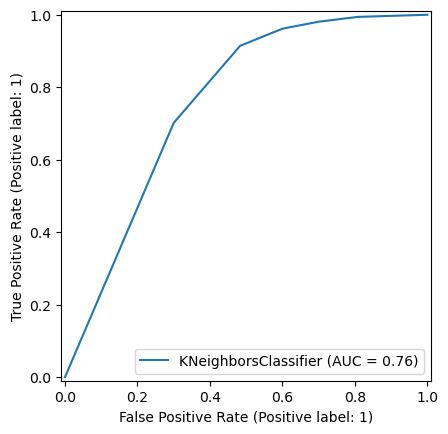

In [50]:
# Plot ROC curve for KNN
knn_roc = RocCurveDisplay.from_estimator(knn, X_test, y_test)

Code Reuse Session - Code Block 27

In [51]:
# Initialize and evaluate Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
# Check accuracy
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

Naïve Bayes Accuracy: 0.7779171894604768


Code Reuse Session - Code Block 17

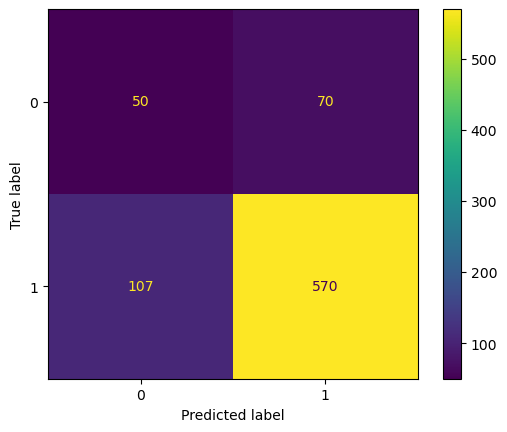

In [52]:
# Create confusion matrix for Naive Bayes
nb_cm = confusion_matrix(y_test, y_pred_nb, labels = nb.classes_)
nb_cm = ConfusionMatrixDisplay(nb_cm, display_labels = nb.classes_)
nb_cm.plot()

Code Reuse Session - Code Block 19

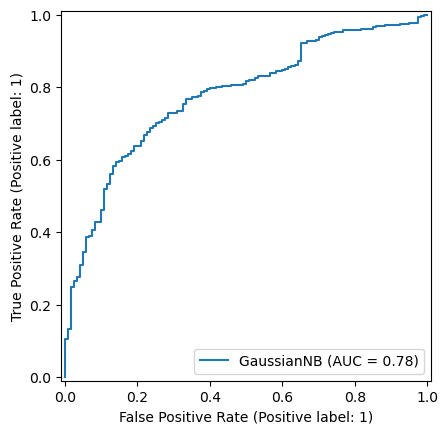

In [53]:
# Plot ROC curve for Naive Bayes
nb_roc = RocCurveDisplay.from_estimator(nb, X_test, y_test)

Code Reuse Session - Code Block 18

In [54]:
# Generate classification report for Naive Bayes
print("Classification Report for Naïve Bayes:")
print(classification_report(y_test, y_pred_nb, zero_division=0))

Classification Report for Naïve Bayes:
              precision    recall  f1-score   support

           0       0.32      0.42      0.36       120
           1       0.89      0.84      0.87       677

    accuracy                           0.78       797
   macro avg       0.60      0.63      0.61       797
weighted avg       0.80      0.78      0.79       797

